# Assignment 6: Neural Networks

*David Edwards*

## Overview

You will write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below.  You will do this once for a regression problem and once for a classification problem. 

## Required Code

In [1]:
# global variable to return errors for plotting, without breaking the return values expected by auto-grader
resultErrors = []

def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    """
    Trains neural networks repeatedly.
    :param X: Data to partition and train
    :param T: Target values
    :param trainFraction: What percent of the data should be used for training
    :param hiddenLayerStructures: Number of hidden layer structures while training
    :param numberRepetitions: Number of times to run train
    :param numberIterations: Iterations within Neural Network
    :param classify: Classification or Regression
    :return: List containing the hidden layer structure, the training error and testing error, and the elapsed time.
    """
    import numpy as np
    import neuralnetworks as nn
    import time
    import mlutils as ml

    results = []
    global resultErrors
    resultErrors = []

    # debugging
    verbose = True

    for structure in hiddenLayerStructures:
        trainList = []
        testList = []
        t0 = time.time()
        for i in range(numberRepetitions):
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, (trainFraction, 1 - trainFraction), classification=classify)
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1],structure,len(np.unique(T)))
            else:
                nnet = nn.NeuralNetwork(X.shape[1],structure,T.shape[1])

            nnet.train(Xtrain, Ttrain, numberIterations)

            Ytrain = nnet.use(Xtrain)

            Ytest = nnet.use(Xtest)

            trainList.append(np.sqrt(np.mean((Ytrain - Ttrain ) ** 2)))
            testList.append(np.sqrt(np.mean((Ytest - Ttest) ** 2)))

        timeTaken = time.time() - t0
        resultErrors.append([structure, nnet.getErrorTrace()])
        results.append([structure, trainList, testList, timeTaken])
    return results

In [2]:
def summarize(results):
    """
    Summarizes the return data from trainNNs
    :param results: List containing the hidden layer structure, the training error and testing error, and the elapsed time.
    :return: List returning the mean errors for the iterations within trainNNs
    """
    import numpy as np
    summary = []
    for item in results:
        summary.append([item[0], np.mean(item[1]), np.mean(item[2]), item[3]])

    return summary


In [3]:
def bestNetwork(summary):
    """
    Returns the best hidden structure/error/time
    :param summary: Summary data from summarize
    :return: Best hidden structure/error/time from the list.
    """
    return min(summary, key = lambda x: x[2])

## Regression Experiment

This data assumes that energydata_complete.csv exists in the same directory as the notebook.

I used pandas to import the data as I've used it for a home project (https://github.com/doofusdavid/speedtestgraph) and found that it makes the CSV import easy, and assigns human-readable names to columns, as long as the columns have names.

In order to get the appropriate T and X, I keep the two columns, "Appliances" and "Lights" for T, and drop those columns, and keep all the rest of X.



In [5]:
import pandas as pd

energydata = pd.read_csv("energydata_complete.csv")
energydata = energydata.drop(["date","rv1","rv2"], axis=1)

print(energydata.columns.values)


Tnames = energydata[["Appliances","lights"]].columns.values
Tenergy = energydata[["Appliances","lights"]].as_matrix()
#print(Tenergy)
Xnames = energydata.drop(["Appliances", "lights"], axis=1).columns.values
Xenergy = energydata.drop(["Appliances", "lights"], axis=1).as_matrix()

print(Tenergy.shape)
print(Xenergy.shape)
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 1, 2, 3, 4, 5, [5, 5], [10, 10], [5,5,5]], 10, 100)
results = trainNNs(Xenergy, Tenergy, 0.8, [[10, 10]], 10, 1000)
#results, resultErrors = trainNNs(Xenergy, Tenergy, 0.8, [4], 10, 100)
print(summarize(results))
print(bestNetwork(summarize(results)))



['Appliances' 'lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5'
 'RH_5' 'T6' 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out'
 'Press_mm_hg' 'RH_out' 'Windspeed' 'Visibility' 'Tdewpoint']
(19735, 2)
(19735, 24)
[[0, 67.036243340830296, 67.683642575512479, 2.388540029525757], [1, 70.527081743388536, 69.477695660897169, 11.617201328277588], [2, 66.096559909227707, 67.431491413728892, 21.334362030029297], [3, 66.024109665381687, 65.954195567926362, 22.006477117538452], [4, 65.529275602943585, 65.710161899520259, 23.91888999938965], [5, 65.101867620726097, 65.415606798500079, 25.60195803642273], [[5, 5], 64.777410397447582, 65.947433174821668, 32.31341791152954], [[10, 10], 63.284575166078795, 64.321428206974687, 41.53078103065491], [[5, 5, 5], 64.947067892022716, 65.966163514793138, 35.963382959365845]]
[[10, 10], 63.284575166078795, 64.321428206974687, 41.53078103065491]


9


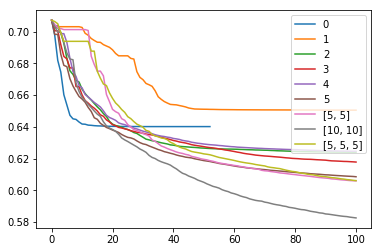

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print(len(resultErrors))

for i in range(len(resultErrors)):
    plt.plot(resultErrors[i][1], label=resultErrors[i][0])
    
plt.legend()
plt.show()


In this test, as with the one following, the 10,10 produced the most rapidly dropping test values.  I decided to try it with more iterations.

In [29]:
results = trainNNs(Xenergy, Tenergy, 0.8, [[10, 10]], 10, 500)

In [30]:
summarize(results)

[[[10, 10], 58.735652171831831, 63.14705005989557, 212.65679693222046]]

In [31]:
bestNetwork(summarize(results))

[[10, 10], 58.735652171831831, 63.14705005989557, 212.65679693222046]

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

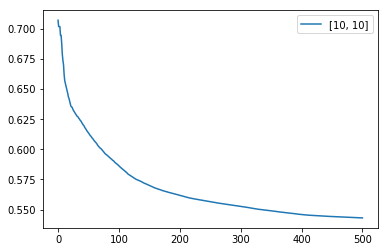

In [33]:
for i in range(len(resultErrors)):
    plt.plot(resultErrors[i][1], label=resultErrors[i][0])
    
plt.legend()
plt.show()


In this case, the progression continues to descend over 500 iterations.  It looks like it would never reach or approach zero, but more definitely helps in this case.

## Classification Experiment

This code depends on the file `Frogs_MFCCs.csv` existing in the directory.  

Like the Regression experiment, I used pandas to read in the data, and remove the unwanted fields from the data.

I created the indexes for the T data by getting the unique values of the speicesList, then creating a dictionary of the species, and the index of it.  Then, I did a pandas.replace, replacing the species value with the index from the database.  Then, I reshaped them to make it a 2 dimensional array.

In [15]:
import pandas as pd
import numpy as np

frogdata = pd.read_csv("Frogs_MFCCs.csv")
print(frogdata.columns.values)

speciesList = frogdata["Species"]

uniqueSpecies = np.unique(speciesList)

speciesDict = dict(enumerate(uniqueSpecies))

Tanuran = speciesList.replace(speciesDict.values(), speciesDict.keys()).as_matrix().reshape(-1,1)
Xanuran = frogdata.drop(["MFCCs_ 1","Family", "Genus", "Species", "RecordID"], axis=1).as_matrix()

print(Xanuran.shape)
print(Tanuran.shape)
print(Xanuran[:2,:])
print(Tanuran[:2])

for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

print(summarize(results))

print(bestNetwork(summarize(results)))

['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22' 'Family' 'Genus' 'Species'
 'RecordID']
(7195, 21)
(7195, 1)
[[ 0.15 -0.11  0.2   0.32  0.26  0.1  -0.15 -0.17  0.12  0.19 -0.08 -0.16
   0.08  0.14 -0.02 -0.11 -0.08 -0.01  0.06  0.12  0.01]
 [ 0.17 -0.1   0.27  0.34  0.27  0.06 -0.22 -0.21  0.17  0.27 -0.1  -0.25
   0.02  0.16  0.01 -0.09 -0.06 -0.04  0.02  0.08  0.03]]
[[0]
 [0]]
672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9
[[0, 0.54220990127993152, 0.59683525197636533, 1.8096199035644531], [5, 0.61788331931307994, 0.74431489675743556, 3.562213182449341], [[5, 5], 0.67253624462640116, 0.77009485467208427, 4.6

In [16]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [17]:
Xanuran[:2,:]

array([[ 0.15, -0.11,  0.2 ,  0.32,  0.26,  0.1 , -0.15, -0.17,  0.12,
         0.19, -0.08, -0.16,  0.08,  0.14, -0.02, -0.11, -0.08, -0.01,
         0.06,  0.12,  0.01],
       [ 0.17, -0.1 ,  0.27,  0.34,  0.27,  0.06, -0.22, -0.21,  0.17,
         0.27, -0.1 , -0.25,  0.02,  0.16,  0.01, -0.09, -0.06, -0.04,
         0.02,  0.08,  0.03]])

In [23]:
Tanuran[:2]

array([[0],
       [0]])

In [24]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [25]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [26]:
summarize(results)

[[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131],
 [5, 0.035267546907574707, 0.041000694927032663, 5.346082448959351],
 [[5, 5], 0.046699096594857534, 0.057956914523974987, 6.503756046295166]]

In [27]:
bestNetwork(summarize(results))

[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131]

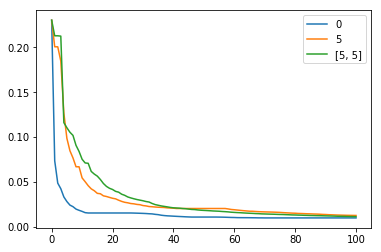

In [18]:
for i in range(len(resultErrors)):
    plt.plot(resultErrors[i][1], label=resultErrors[i][0])
    
plt.legend()
plt.show()

For this case, 0 hidden layers drops the fastest

In [19]:
results = trainNNs(Xanuran, Tanuran, 0.8, [1, 2, 3, 4, 5, 10, [5, 5], [10, 10], [5, 5, 5]], 5, 100, classify=True)

In [21]:
bestNetwork(summarize(results))

[10, 0.26942676584823744, 0.57605549663713584, 4.584028959274292]

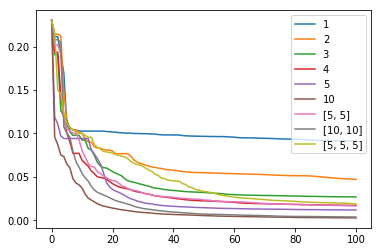

In [20]:
for i in range(len(resultErrors)):
    plt.plot(resultErrors[i][1], label=resultErrors[i][0])
    
plt.legend()
plt.show()

In this case, the single hidden layer of 10 seems to have the best results.  

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [4]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

A6 Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 points. Train some networks by calling